#### Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?

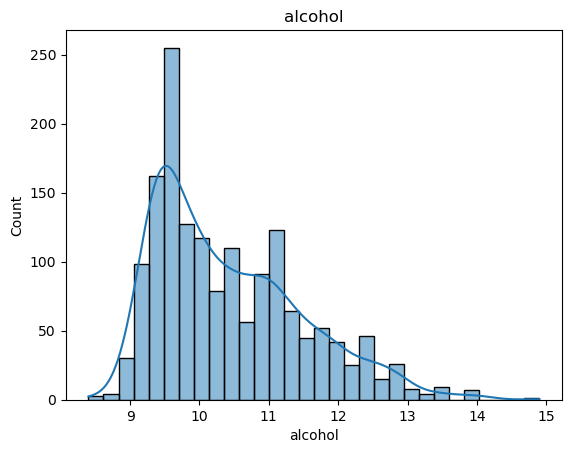

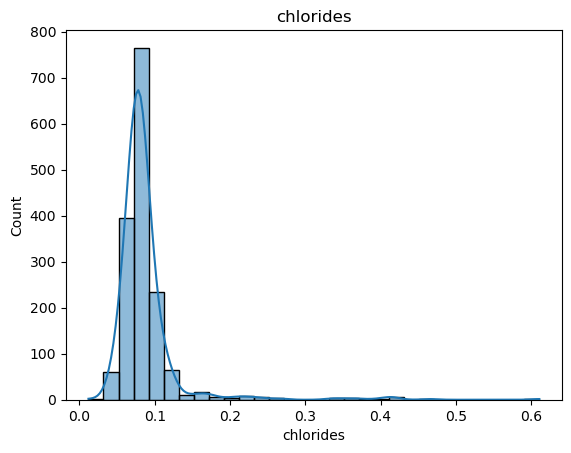

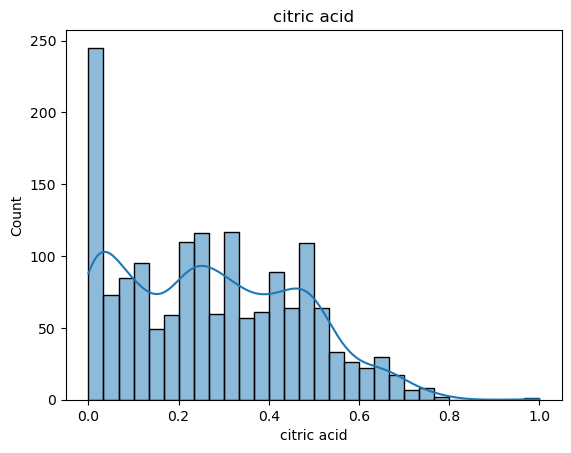

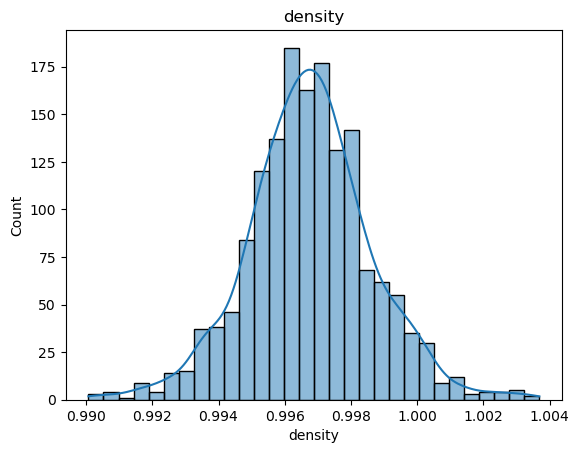

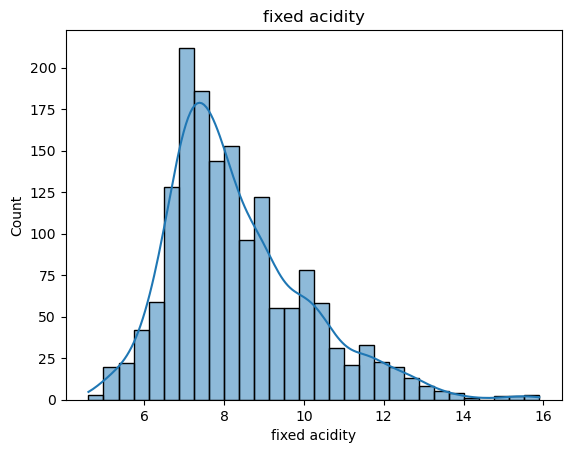

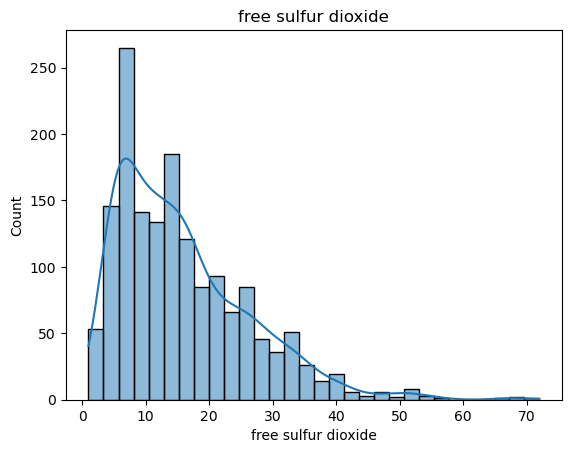

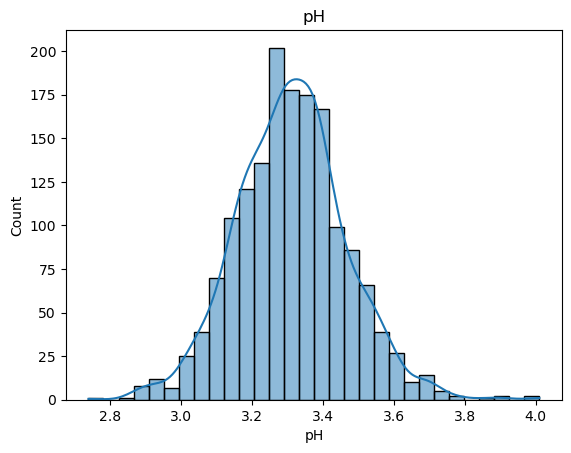

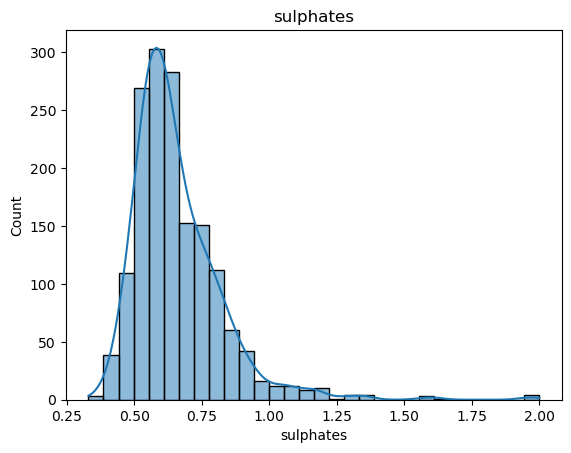

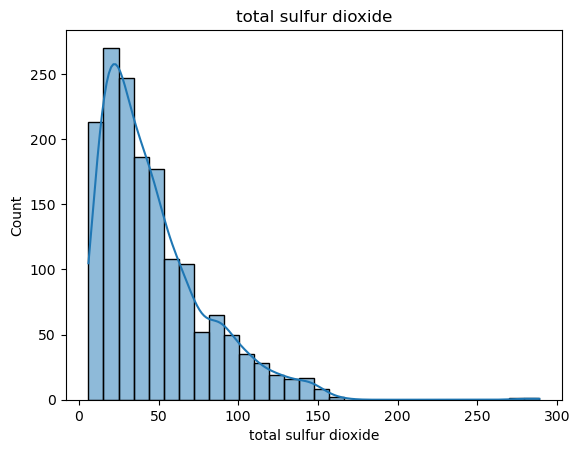

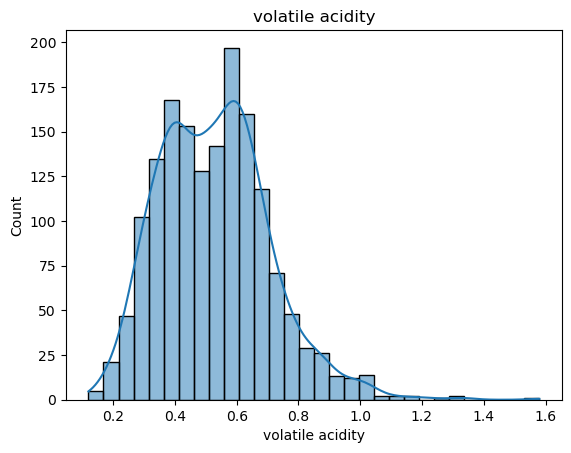

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('winequality-red.csv')

# Keep only numerical features
df = df[['alcohol', 'chlorides', 'citric acid', 'density', 
         'fixed acidity', 'free sulfur dioxide', 'pH', 
         'sulphates', 'total sulfur dioxide', 'volatile acidity']]

# Distribution of features         
for col in df.columns:
    sns.histplot(df[col], kde=True,bins=30)
    plt.title(col)
    plt.show()

These features doesn't seem to have non-normal distribution:

1. chlorides
2. citric acid
3. free sulfur dioxide
4. total sulfur dioxide
5. volatile acidity
6. Sulphate

To improve normality we can do following:

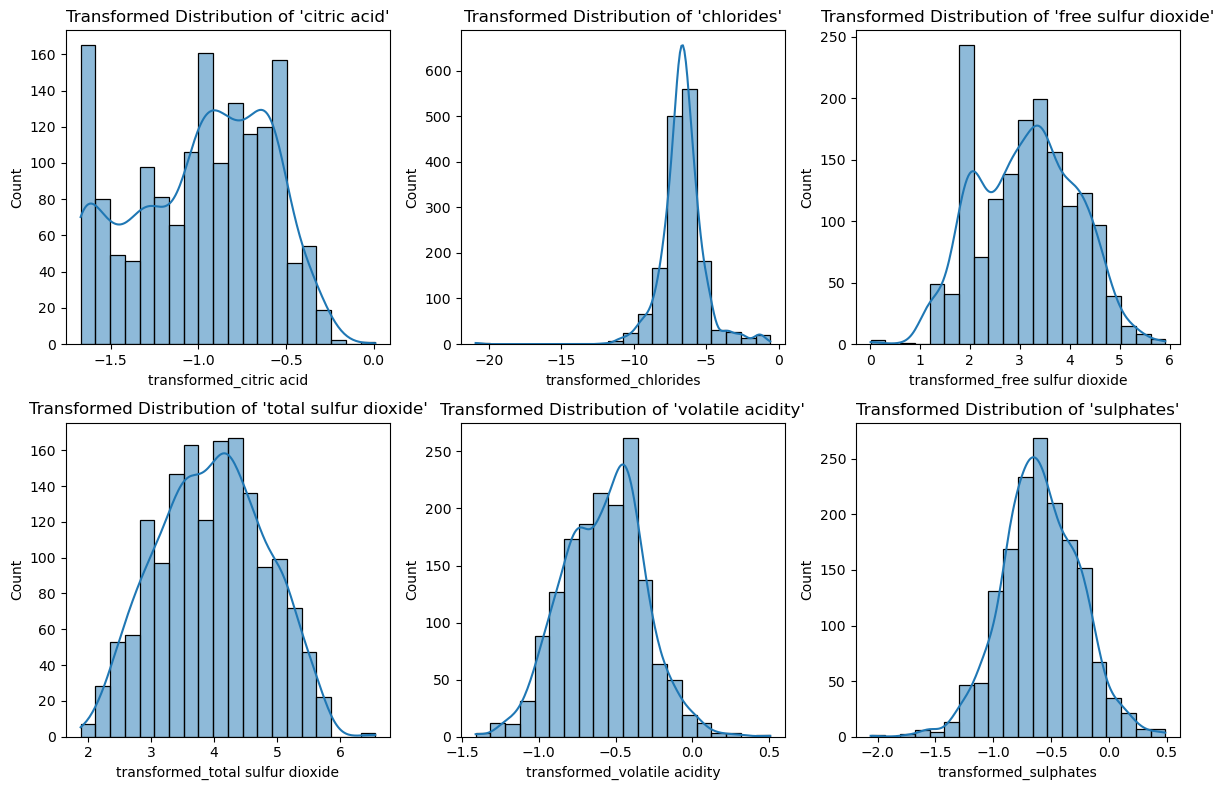

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox


# List of non-normal features (you can adjust this based on your data)
non_normal_features = ['citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','volatile acidity','sulphates']

# Apply Box-Cox transformation to non-normal features
for feature in non_normal_features:
    transformed_feature, _ = boxcox(df[feature] + 0.01)  # Adding a small constant to avoid zero values
    df[f'transformed_{feature}'] = transformed_feature

    
    
# Visualize the transformed distributions
plt.figure(figsize=(12, 8))
for feature in non_normal_features:
    transformed_feature = df[f'transformed_{feature}']
    plt.subplot(2, 3, non_normal_features.index(feature) + 1)
    sns.histplot(transformed_feature, bins=20, kde=True)
    plt.title(f"Transformed Distribution of '{feature}'")
plt.tight_layout()
plt.show()


#### Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?

In [135]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df=pd.read_csv('winequality-red.csv')

# Separate features (X) and target (y)
X = df.drop(columns=['quality'])
y = df['quality']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Find the minimum number of principal components to explain 90% of the variance
min_components = np.argmax(cumulative_explained_variance >= 0.90) + 1


Minimum number of principal components to explain 90% of variance: 7


In [151]:
df_transformed=pd.DataFrame(X_pca,columns=scaler.get_feature_names_out())

df_transformed

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258,0.005098,-0.267759,0.048630
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,0.929714,-1.009829,0.762587,-0.520707,0.062833,-0.138142
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,0.401473,-0.539553,0.597946,-0.086857,-0.187442,-0.118229
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,-0.131017,0.344290,-0.455375,0.091577,-0.130393,0.316714
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258,0.005098,-0.267759,0.048630
...,...,...,...,...,...,...,...,...,...,...,...
1594,-2.150500,0.814286,0.617063,0.407687,-0.240936,0.054835,0.170812,-0.355866,-0.971524,0.356851,-0.053382
1595,-2.214496,0.893101,1.807402,0.414003,0.119592,-0.674711,-0.607970,-0.247640,-1.058135,0.478879,-0.241258
1596,-1.456129,0.311746,1.124239,0.491877,0.193716,-0.506410,-0.231082,0.079382,-0.808773,0.242248,-0.402910
1597,-2.270518,0.979791,0.627965,0.639770,0.067735,-0.860408,-0.321487,-0.468876,-0.612248,0.779404,0.040923


In [152]:
print(f"Minimum number of principal components to explain 90% of variance: {min_components}")

Minimum number of principal components to explain 90% of variance: 7
